## 5. 데이터 전처리

**<i class="fa fa-question-circle"></i> :**  ScikitLearn에서 모델을 돌리기 전에 처리해야 하는 주의사항<br>
1. 결측값, NaN, Null값은 허용이 되지 않는다!!  
  *  피처 값 중 Null값이 별로 없다면 피처의 평균값으로 대체  
  * Null값이 대부분이라면 드롭하는 것이 더 좋다.  
2. 사이킷런은 문자열 값을 입력 값으로 허용하지 않는다!!  
  => 모든 문자열 값은 인코딩돼서 숫자 형으로 변환해야 한다.  


### 5-1) 데이터 인코딩 : label encoding / one hot encoding
### 레이블과 원핫인코딩 차이
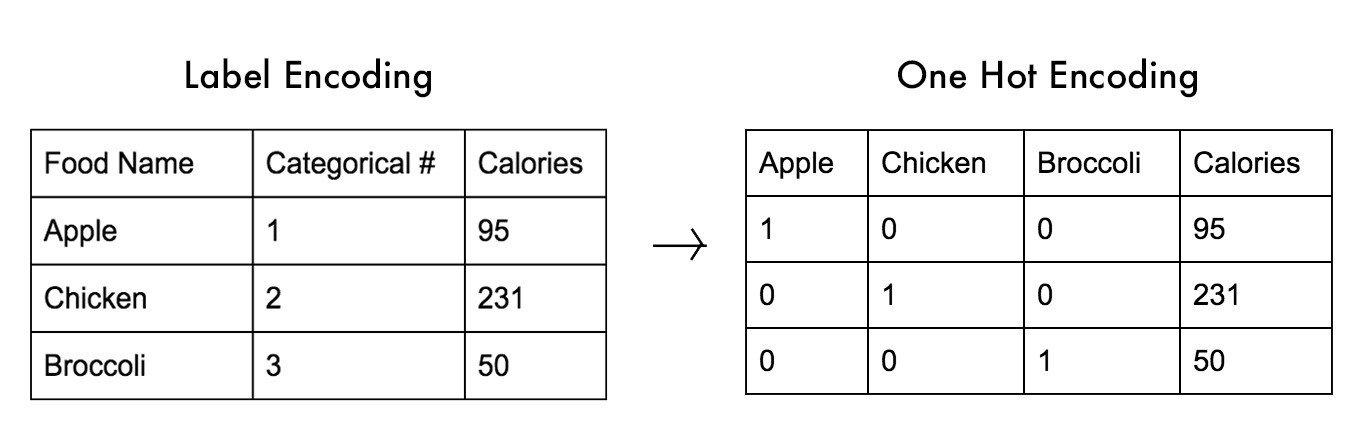

Label Encoding  
- 장점 : 그냥 카테고리 변수를 알아서 0부터 숫자로 변경해 줌  
- 단점 : 숫자로 변경이 되다보니 숫자의 크기가 모델에 반영이 됨.  
    만약 TV를 0, 선풍기를 3으로 지정한다면, 0보다 3이 더 크기 때문에 3번인 선풍기를 0번인 TV보다 더 중요하다고 인식할 수도 있다는 것!!  
 
 
- fit(), transform()을 호출해서 수행한다!!


In [1]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


- 위에는 데이터가 작아서 각 문자들이 어떤 숫자로 인코딩 되었는지 한눈에 알 수 있다  
 BUT, 데이터 크기가 크면 class_속성으로 확인하면 된다!!  
 class_는 인코딩된 숫자 순서대로 문자열을 나열해서 보여준다!!

In [34]:
print('인코딩 클래스:',encoder.classes_)
print('디코딩 원본 값:',encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']
디코딩 원본 값: ['전자렌지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


One Hot Encoding  
피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식.  
- 주의사항  
    (1) 원핫인코딩 변환 전에 모든 문자열이 숫자형으로 변환되어야 한다!!  
    
    (2) 입력 값으로 2차원 데이터가 필요하다!!

In [2]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# Step 1) 
# 먼저 숫자값으로 변환을 위해 LabelEncoder로 변환
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)


# Step 2) 2차원 데이터로 변환 
labels = labels.reshape(-1,1)

# 원-핫 인코딩을 적용!!
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


위에 결과보면 데이터 차원이 (8,6)  
즉, 8개의 레코드와 1개의 칼럼을 가진 데이터  
참고로 pandas에서는 get_dummies()이용하면 문자열 카테고리를 숫자로 안바꾸고 원핫인코딩 더 쉽게 할 수 있음!! 아래 처럼

In [4]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서'] })
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


## 6. Feature Scaling & Normalization  
Feature Scaling : 서로 다른 변수의 값의 범위를 일정한 수준으로 맞추는 작업  
대표적인 방법으로 "표준화 Standardization" & "정규화 Normalization"  
사이킷런에서 제공하는 대표 피처 스케일링 클래스는 "StandardScaler" & "MinMaxSclaer"

1. 표준화  
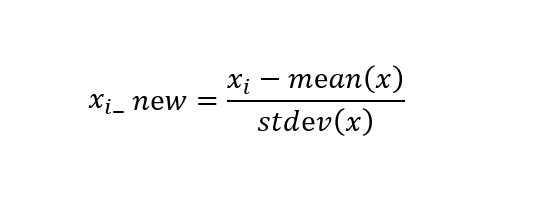  
데이터의 피러 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것  
표준화를 통해 변활된 피처 x의 새로운 i번째 데이터를 xi_new라고 한다면 이 값은 원래값 xi에서 피처 x의 평균 mean(x)을 뺀 값을 피처 x의 표준 편차로 나눈 값


2. 정규화  
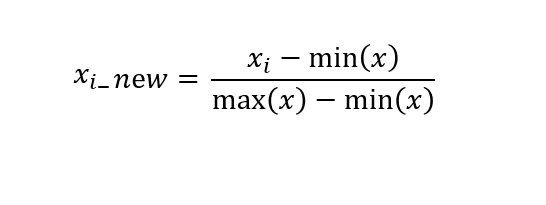  
서로 다른 피처들의 크기를 통일하기 위해 크기를 변화해주는 것.  
예를들어 A피처는 값이 0 ~ 100KM 거리를 나타내고 B피처는 0 ~ 100,000,000,00으로 금액을 나타낸다고 했을때 이 변수들을 동일한 크기의 단위로 값을 최소 0~ 최대 1의 값으로 변환하는 것!! 
개별 데이터의 크기를 모두 똑같은 단위로 변경한다고 생각

In [6]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())


feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


### 6-1) Standard Scaler : 평균0, 분산1으로 변환  표준화 해보자
위에 붓꽃 데이터 가지고 표준화

In [7]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되기 때문에 
# 이를 다시 DataFrame으로 변환해주어야 한다!!
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


위에 결과 보면 Standard Scaler를 사용함으로써 평균이 0에 가깝고, 분산은 1에 가까운 값으로 변환되었음

### 6-2) MinMaxScaler : 0 ~ 1사이의 값으로!! 
   ### 혹시 음수의 값이 있다면 -1 ~ +1의 값으로 변환을 함.

In [8]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# 마찬가지로 transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환
# 따라서 다시 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature들의 최대 값')
print(iris_df_scaled.max())

feature들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


**<i class="fa fa-question-circle"></i> <i class="fa fa-question-circle"></i> :** train과 test의 변환 기준이 동일해야 한다.    
Scaler객체 사용해 학습 데이터 세트로 fit(),tansform()적용하면, 테스트 데이터 세트로는 fit()하지 않고 학습 데이터로 fit()을 수행한 결과에 transform()변환 적용!! 
즉, 학습데이터로 fit()이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용해야함   
만약, 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들면 스케일링 기준 정보가 서로 달라져서 예측이 올바르지 못함  

In [9]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0 부터 10까지, 테스트 데이터는 0 부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array =  np.arange(0, 6).reshape(-1, 1)

#### 학습 데이터(train_array) 변환

In [10]:
# 최소값 0, 최대값 1로 변환하는 MinMaxScaler객체 생성
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최소값이 0, 최대값이 10으로 설정.  
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 즉, 1은 0.1이 되고 10은 1이 됨
train_scaled = scaler.transform(train_array)
 
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


#### 테스트 데이터(test_array) 변환 
#### ** fit()으로 스케일링 기준 정보 다시 적용했을 때 

In [11]:
# 원본 데이터의 최소값이 0, 최대값이 5으로 설정됨 
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 1은 0.2, 5는 1로 
test_scaled = scaler.transform(test_array)

# train_array 변환 출력
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))


원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


### 위에 결과 보면 학습이랑 테스트 데이터의 스케일링 불일치!! 
학습데이터는 4가 0.4로 변환 테스트 데어터는 2가 0.4!! 
즉, 0.4의 원본데이터가 4와 2로 서로 다르기 때문에 문제가 되는거야 ~ ~ ~

#### **문제점을 알았으니 테스트 데이터에는 fit()적용하지말고 학습데이터로 fit()적용된걸 transform()해보자 !!

In [12]:
scaler = MinMaxScaler()

# 먼저 학습 데이터 fit(), transform()!!
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환!!
# fit()을 호출하지 않고 transform() 만으로 변환
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))


원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


짜잔~~~~ 결과 보면 학습데이터, 테스트 데이터 모두 동일하게 변환되었따!!!

# 정리!!!
#### 1. ScikitLearn 모델 돌리려면 결측값은 없어야하고, 문자열은 숫자형으로 바꿔줘야해!! 즉, 데이터 전처리 아주아주 중요  
#### 2. 문자열값을 숫자형으로 변환하기위해 인코딩 작업 => 레이블 인코딩/ 원핫인코딩 /아니면 판다스의 get_dummies() 해주기  
#### 3. 선형 회귀나 로지스틱 회귀 등은 스케일의 영향을 받기 때문에, 피처 스케일링 꼭꼭 해주기!!
#### 3-1. StandardScaler는 평균 0 분산 1로 스케일링하는 방법
#### 3-2. MinMaxScaler는 모든 피처 값을 0 ~ 1 범위 값으로 압축/확장 시키는 방법 => 1 ~ 10이면 1/10해서 1은 0.1, 2는 0.2, 10은 1로 만드는 것  
#### 3-3. 이건 정말 정말 중요!!! 테스트 데이터를 스케일링할때는 fit()하면 안됨!!! 그러면 학습 데이터랑 기준이 달라지기 때문!! 
#### => 따라서 가장 좋은 방법은 전체 데이터를 스케일링 해주고 나중에 학습/테스트 데이터로 분리해주는 것임!! 
#### => 위에 방법이 안된다면, 학습 데이터 fit() + tansform()해주고 테스트 데이터는 학습데이터로 fit()된 Scaler객체를 이용해 transform()해주기!!
